In [1]:
#路径管理/全局变量
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns       # sns 是 seaborn 的常用别名
import matplotlib.pyplot as plt  # plt 是 matplotlib.pyplot 的常用别名

# 设置为项目根目录（包含 data, pipline 等文件夹的目录）
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)
from utils.path_helper import get_data_path

#基础模块
from PreAnalysis.Preprocess import preprocess
from pipeline.pipeline import processing_data
from features_project.features import add_selected_features
from features_project.features_meatures import FeatureAnalysis
from features_project.features_meatures import feature_selection_by_k
from features_project.features_meatures import select_final_top_features
from features_project.features_meatures import check_multicollinearity

#模型导入
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

##调参
from Params_Modify.grid import grid_search_models_f1
from Params_Modify.config_model_params import model_params
from utils.config import best_model_configs
##训练
from train_model.train import train_model_classify

##评估
from evaluate_model.evaluate import evaluate

(4999, 10)
CustomerID: 缺失值数量 = 0
Age: 缺失值数量 = 254
Gender: 缺失值数量 = 0
Tenure_Months: 缺失值数量 = 257
Contract_Type: 缺失值数量 = 235
Monthly_Charges: 缺失值数量 = 270
Data_Usage_GB: 缺失值数量 = 257
Payment_Method: 缺失值数量 = 224
Customer_Service_Calls: 缺失值数量 = 259
Churn: 缺失值数量 = 0
(3973, 10)
(3973, 10)
CustomerID: 缺失值数量 = 0
Age: 缺失值数量 = 0
Gender: 缺失值数量 = 0
Tenure_Months: 缺失值数量 = 0
Contract_Type: 缺失值数量 = 0
Monthly_Charges: 缺失值数量 = 0
Data_Usage_GB: 缺失值数量 = 0
Payment_Method: 缺失值数量 = 0
Customer_Service_Calls: 缺失值数量 = 0
Churn: 缺失值数量 = 0
(3973, 10)
处理前 hot_gender 的 df.columns: ['CustomerID', 'Age', 'Gender', 'Tenure_Months', 'Contract_Type', 'Monthly_Charges', 'Data_Usage_GB', 'Payment_Method', 'Customer_Service_Calls', 'Churn', 'normal_age', 'Data_Usage_log', 'Monthly_Charges_log']
可用特征函数： ['age', 'standardize_age', 'normal_age', 'hot_gender', 'Tenure_Months', 'Avg_Tenure_Month', 'Contract_Type', 'Data_Usage_log', 'Monthly_Charges_log', 'Payment_Method_hot', 'Customer_Service_Calls_hot']
CustomerID
Age
Tenure_Mon

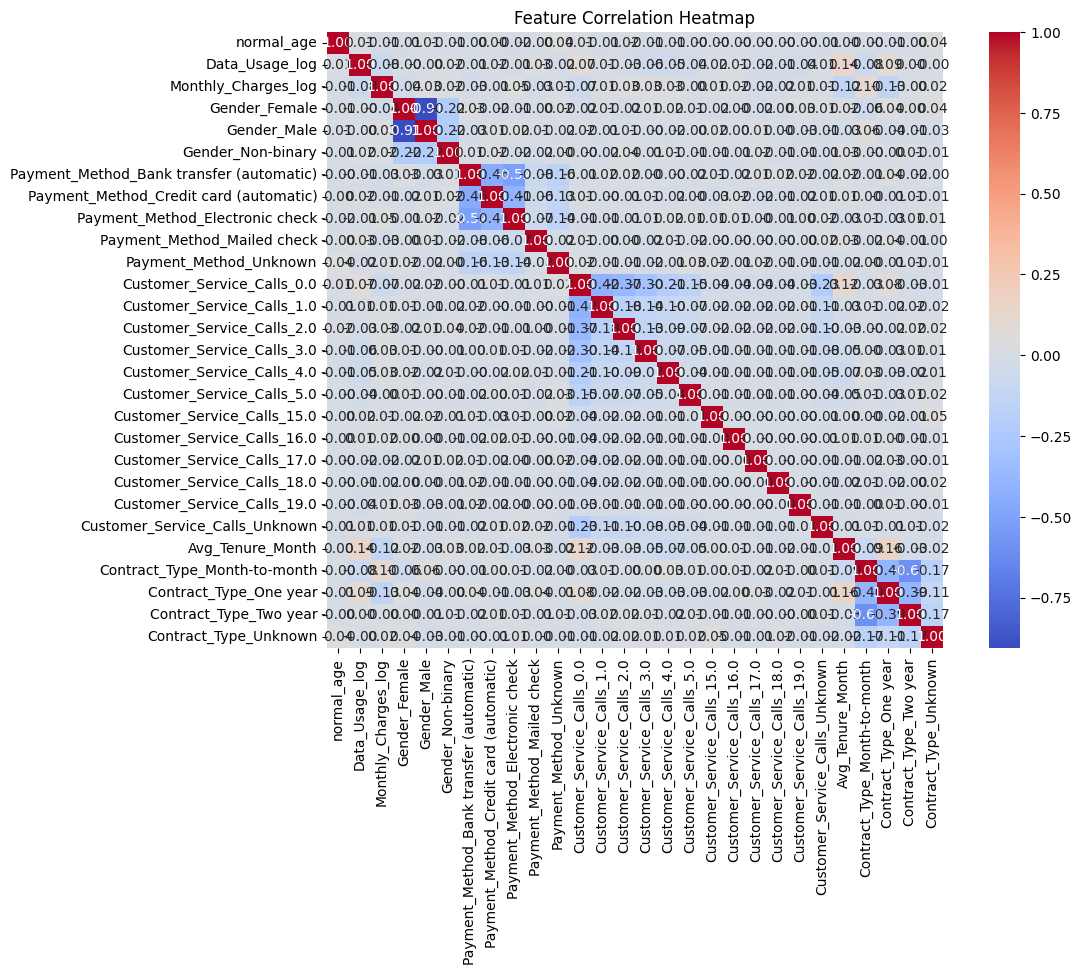

 高度相关的特征对（|相关性| > 0.85)：
Gender_Male & Gender_Female → 相关系数: -0.906
🔍 检测到 0 个高相关特征将被删除（阈值：0.85）：
[]
normal_age
Data_Usage_log
Monthly_Charges_log
Gender_Female
Gender_Male
Gender_Non-binary
Payment_Method_Bank transfer (automatic)
Payment_Method_Credit card (automatic)
Payment_Method_Electronic check
Payment_Method_Mailed check
Payment_Method_Unknown
Customer_Service_Calls_0.0
Customer_Service_Calls_1.0
Customer_Service_Calls_2.0
Customer_Service_Calls_3.0
Customer_Service_Calls_4.0
Customer_Service_Calls_5.0
Customer_Service_Calls_15.0
Customer_Service_Calls_16.0
Customer_Service_Calls_17.0
Customer_Service_Calls_18.0
Customer_Service_Calls_19.0
Customer_Service_Calls_Unknown
Avg_Tenure_Month
Contract_Type_Month-to-month
Contract_Type_One year
Contract_Type_Two year
Contract_Type_Unknown
传入的特征数: 28
原始 df.shape: (3973, 28)
最终进入VIF计算的列数: 28
进入VIF计算的特征列: ['normal_age', 'Data_Usage_log', 'Monthly_Charges_log', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Payment_Method_Bank trans

d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


🧪 方差膨胀因子(VIF)检测结果:
                                     feature  VIF
4                              Gender_Female  inf
5                                Gender_Male  inf
6                          Gender_Non-binary  inf
7   Payment_Method_Bank transfer (automatic)  inf
8     Payment_Method_Credit card (automatic)  inf
9            Payment_Method_Electronic check  inf
10               Payment_Method_Mailed check  inf
11                    Payment_Method_Unknown  inf
12                Customer_Service_Calls_0.0  inf
13                Customer_Service_Calls_1.0  inf
14                Customer_Service_Calls_2.0  inf
15                Customer_Service_Calls_3.0  inf
16                Customer_Service_Calls_4.0  inf
17                Customer_Service_Calls_5.0  inf
18               Customer_Service_Calls_15.0  inf
19               Customer_Service_Calls_16.0  inf
20               Customer_Service_Calls_17.0  inf
21               Customer_Service_Calls_18.0  inf
22               Customer_Servi

d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


⚠️  删除高VIF特征: Gender_Female (VIF=inf)


d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


⚠️  删除高VIF特征: Payment_Method_Bank transfer (automatic) (VIF=inf)


d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


⚠️  删除高VIF特征: Customer_Service_Calls_0.0 (VIF=inf)
⚠️  删除高VIF特征: Contract_Type_Month-to-month (VIF=inf)


d:\soft\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\soft\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


去掉缺失值后的形状: (3973, 24)
24
    num_features                                       top_features
0             10  [Data_Usage_log, Monthly_Charges_log, Gender_M...
1             11  [Data_Usage_log, Monthly_Charges_log, Gender_M...
2             12  [Data_Usage_log, Monthly_Charges_log, Gender_M...
3             13  [Data_Usage_log, Monthly_Charges_log, Gender_M...
4             14  [Data_Usage_log, Monthly_Charges_log, Gender_M...
5             15  [Data_Usage_log, Monthly_Charges_log, Gender_M...
6             16  [Data_Usage_log, Monthly_Charges_log, Gender_M...
7             17  [Avg_Tenure_Month, Data_Usage_log, Monthly_Cha...
8             18  [Avg_Tenure_Month, Data_Usage_log, Contract_Ty...
9             19  [Avg_Tenure_Month, Data_Usage_log, Contract_Ty...
10            20  [Avg_Tenure_Month, Data_Usage_log, Gender_Male...
Avg_Tenure_Month
Data_Usage_log
Gender_Male
Contract_Type_Two year
Contract_Type_One year
Monthly_Charges_log
Payment_Method_Credit card (automatic)
Payment_Me

In [2]:
#读取数据
df = pd.read_csv(get_data_path("TrainingSet.csv"))
print(df.shape)
##实例化后方便初步分析
process_data = preprocess(df)
#填充前看图 raw pictures
#process_data. picture_analysis()  ##if you want to analyse through the pictures, canceling "##"
##查验并填充
process_data.missingdata_count()
df_withoutfalse = process_data.detect_extreme()
print(df_withoutfalse.shape)
#完成填充缺失值
df_withoutfalse = processing_data(df_withoutfalse)
df_withoutfalse.processing_number_data()
df_cleaned = df_withoutfalse.processing_amount_data()
print(df_cleaned.shape)
#填充后看图 new pictures   ##if you want to analyse through the pictures, canceling "##"
process_data_after = preprocess(df_cleaned)
#process_data_after.picture_analysis()  ##if you want to analyse through the pictures, canceling "##"
process_data_after.missingdata_count()
print(df_cleaned.shape)


#录入特征值
My_features = ["normal_age", "Data_Usage_log", "Monthly_Charges_log", "hot_gender","Payment_Method_hot", "Customer_Service_Calls_hot","Avg_Tenure_Month", "Contract_Type"]
#加入特征值
df_cleaned_features,added_features = add_selected_features(df_cleaned, features_to_use=My_features)
for col in df_cleaned_features.columns:
    print(col)
print(df_cleaned_features[added_features].dtypes)
#转bool为数值
df_cleaned_features[added_features] = df_cleaned_features[added_features].astype("int")
df_cleaned_features_1 = df_cleaned_features.copy()



#相关性分析
df_cleaned_features = FeatureAnalysis(df_cleaned_features, features=added_features, model_cls=RandomForestClassifier, target_col="Churn")
#df_cleaned_features.plot_feature_importance()  ##if you want to analyse through the pictures, canceling "##"
#df_cleaned_features.plot_feature_distribution()  ##if you want to analyse through the pictures, canceling "##"
#df_cleaned_features.plot_feature_vs_target()    ##if you want to analyse through the pictures, canceling "##"
advanced_feature = df_cleaned_features.plot_feature_correlation(add_features=added_features)
###########
df_cleaned_features_1[advanced_feature] = df_cleaned_features_1[advanced_feature].astype("int")
###########



##VIF分析
for feature in advanced_feature:
    print(feature)
advanced_features_ultimate = check_multicollinearity(df_cleaned_features_1, features = advanced_feature, threshold=10, verbose= True)
print(len(advanced_features_ultimate))



##分析每个特征数下的最优组合
df_result = feature_selection_by_k(df_cleaned_features_1[advanced_features_ultimate], target_col = df_cleaned_features_1["Churn"], max_k=20, rank_features=10, model_cls = RandomForestClassifier)
print(df_result)



##直接选出最终最重要的10个特征
final_features = select_final_top_features(df_cleaned_features_1[advanced_features_ultimate], target_col = df_cleaned_features_1["Churn"], max_k=20, top_k=15, model_cls = RandomForestClassifier)
for feature in final_features:
    print(feature)

##检查一下筛选流程    
print(len(My_features)) #8
print(len(added_features))#26
print(len(advanced_feature)) #26
print(len(advanced_features_ultimate))#4
print(len(final_features))#4


In [3]:
##处理测试集


#读取数据
#df_test = pd.read_csv(get_data_path("TestSet.csv"))
#print(df_test.shape)
#print(df_test[df_test.isna().any(axis=1)].shape)
#df_test[df_test.isna().any(axis=1)]

#processor = processing_data(df_test)
#填充测试集
#df_test = processor.processing_number_data()
#df_test = processor.processing_amount_data()
#df_test = processor.processing_Median_fill()

#加入特征值
#df_test_features,added_features_backup = add_selected_features(df_test, features_to_use=My_features)
#转bool为数值
#X_test = df_test_features[final_features]
#y_test = df_test_features["Churn"]

#print(df_test.shape)
#print(df_test[df_test.isna().any(axis=1)].shape)
#df_test[df_test.isna().any(axis=1)]

In [4]:
##网格化调参
X = df_cleaned_features_1[final_features]
y = df_cleaned_features_1["Churn"]
grid_results = grid_search_models_f1(X, y, model_params)
print(grid_results)
##记入config

✅ Logistic 完成：F1 = 0.7226
最佳参数： {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
----------------------------------------
✅ RandomForest 完成：F1 = 0.7307
最佳参数： {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
----------------------------------------


d:\soft\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:02:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost 完成：F1 = 0.7292
最佳参数： {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
----------------------------------------
✅ GBDT 完成：F1 = 0.7298
最佳参数： {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
----------------------------------------
✅ SVM 完成：F1 = 0.6971
最佳参数： {'C': 0.1, 'kernel': 'linear'}
----------------------------------------
          Model  Best F1 Score  \
1  RandomForest       0.730663   
3          GBDT       0.729831   
2       XGBoost       0.729237   
0      Logistic       0.722637   
4           SVM       0.697086   

                                         Best Params  
1  {'max_depth': None, 'min_samples_split': 5, 'n...  
3  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
2  {'learning_rate': 0.1, 'max_depth': 6, 'n_esti...  
0      {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}  
4                     {'C': 0.1, 'kernel': 'linear'}  


In [5]:
#训练模型
after_trained_model,X_train, X_test, y_train, y_test = train_model_classify(df_cleaned_features = df_cleaned_features_1, model_config = best_model_configs["RandomForest"], final_features = final_features)
#评估模型
ev = evaluate(model = after_trained_model, X_test = X_test, y_test = y_test)
#ev.evaluate_classify_model(average="binary") 


✅ 模型训练完成，保存到： models_saved/rf_model.pkl


In [6]:
ev.evaluate_classify_model(average="weighted") 



✅ Accuracy : 0.6642
✅ F1 Score : 0.6857
✅ Precision: 0.7225
✅ Recall   : 0.6642
✅ AUC      : 0.6410


{'Accuracy': 0.6641509433962264,
 'F1': 0.6856835040451538,
 'Precision': 0.7224635101459594,
 'Recall': 0.6641509433962264,
 'AUC': 0.64103133618376}